In [ ]:
import csv

In [ ]:
k = 8
irred = Partition([k - i for i in range(k)])
n = k * (k + 1) // 2
n_fact = math.factorial(n)
identity = Partition([1 for i in range(n)])
dim = symmetrica.charvalue(irred,identity)
par_n = Partitions(n).cardinality()
charvalues_staircase = [symmetrica.charvalue(irred, cls) for cls in Partitions(n)]; 
charvalues_staircase

In [267]:
charvalues = [x^2 for x in charvalues_staircase]
charvalues = vector(QQ,charvalues)
charvalues

(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [268]:
C = charvalues
with open("charValuesSquared"+str(n)+".csv", 'w') as f:
      c = csv.writer(f)
      c.writerows(C)

In [ ]:
char_table = matrix(QQ,symmetrica.chartafel(n))
char_table

In [248]:
coeffs =  char_table.transpose() \ charvalues   
coeffs

(1, 1, 1)

In [249]:
dimens = char_table.columns()[-1]

nb. A \ v for v vector A matrix solves Aw = v

In [250]:
w = [(dimens[i], coeffs[i]) for i in range(par_n)]
w

[(1, 1), (2, 1), (1, 1)]

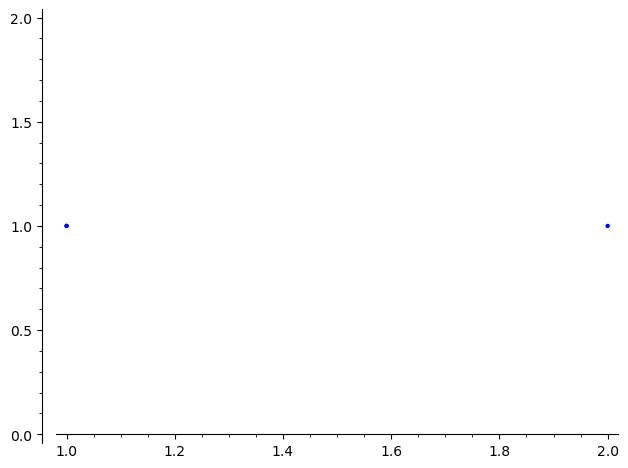

In [251]:
graphed = points(w)
graphed.save('linear'+str(n)+'.png')
show(graphed)

In [252]:
var('a,b')
mymodel(x) = a*x + b 
myfit = find_fit(w,mymodel,solution_dict=True)
points(w,color='purple') + plot(
  mymodel(
    a=myfit[a],
    b=myfit[b]
    ), 
    (x,0,4,),
    color='red'
  )
myfit

{a: -2.1811441541785825e-12, b: 1.0000000000029081}

In [253]:
errors = [coeffs[i] - N((dim^2 / n_fact)*dimens[i]) for i in range(par_n)]


In [254]:
er = [(i, errors[i]) for i in range(par_n)]

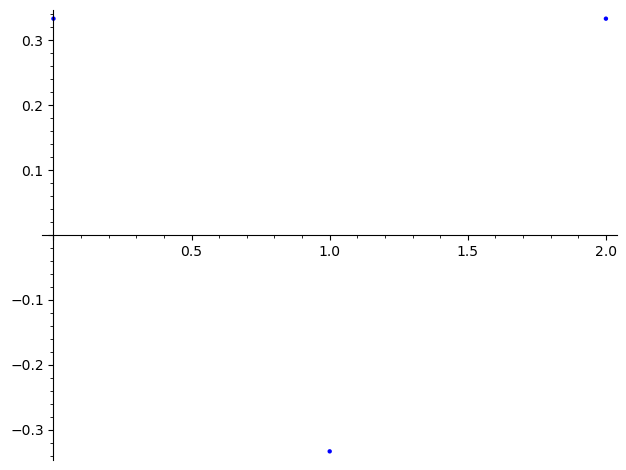

In [255]:
show(points(er))

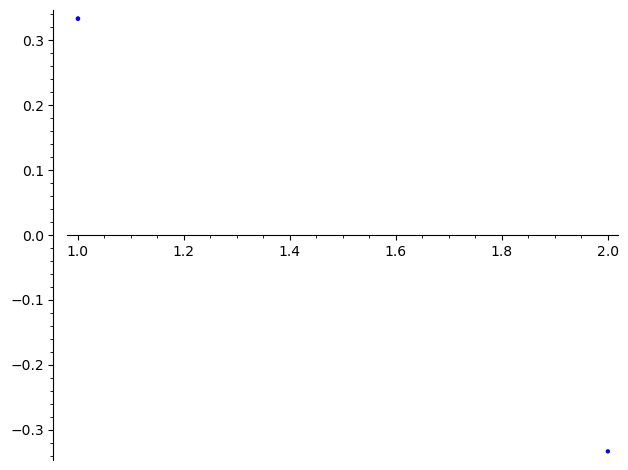

In [256]:
er = [(dimens[i], errors[i]) for i in range(par_n)]
graphed = points(er)
graphed.save('errVdim_mu'+str(n)+'.png')
show(graphed)

In [257]:
abs_err = [abs(errors[i]) for i in range(par_n)]
abs_err

[0.333333333333333, 0.333333333333333, 0.333333333333333]

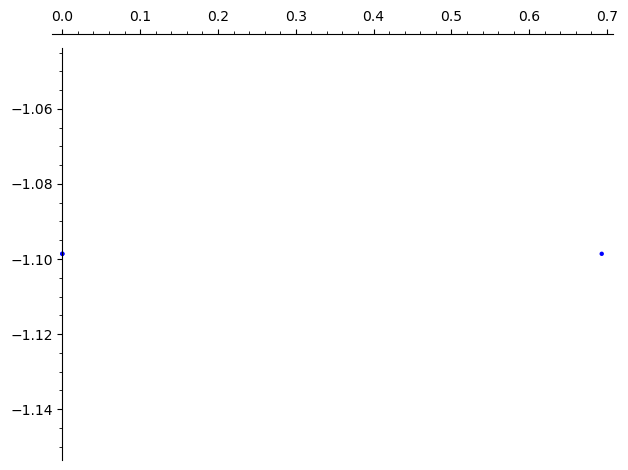

In [258]:
er_log = [(N(log(dimens[i])), log(abs_err[i])) for i in range(par_n)]
graphed = points(er_log)
graphed.save('log_errorVlog_dim_mu'+str(n)+'.png')
show(graphed)

In [259]:
C = coeffs
with open("n_character_table"+str(n)+".csv", 'w') as f:
      c = csv.writer(f)
      c.writerows(C)

In [260]:
C = w
with open("tensorsquaredVdimensmu"+str(n)+".csv", 'w') as f:
      c = csv.writer(f)
      c.writerows(C)

In [261]:
C = er
with open("errorVdim_mu"+str(n)+".csv", 'w') as f:
      c = csv.writer(f)
      c.writerows(C)

In [262]:
C = er_log
with open("log_errorVlog_dim_mu"+str(n)+".csv", 'w') as f:
      c = csv.writer(f)
      c.writerows(C)